<a href="https://colab.research.google.com/github/IlYaSsBJ/Coding-Week/blob/main/Notebooks/XGboost_model_TESTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATASET Winsoring cleaning**

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

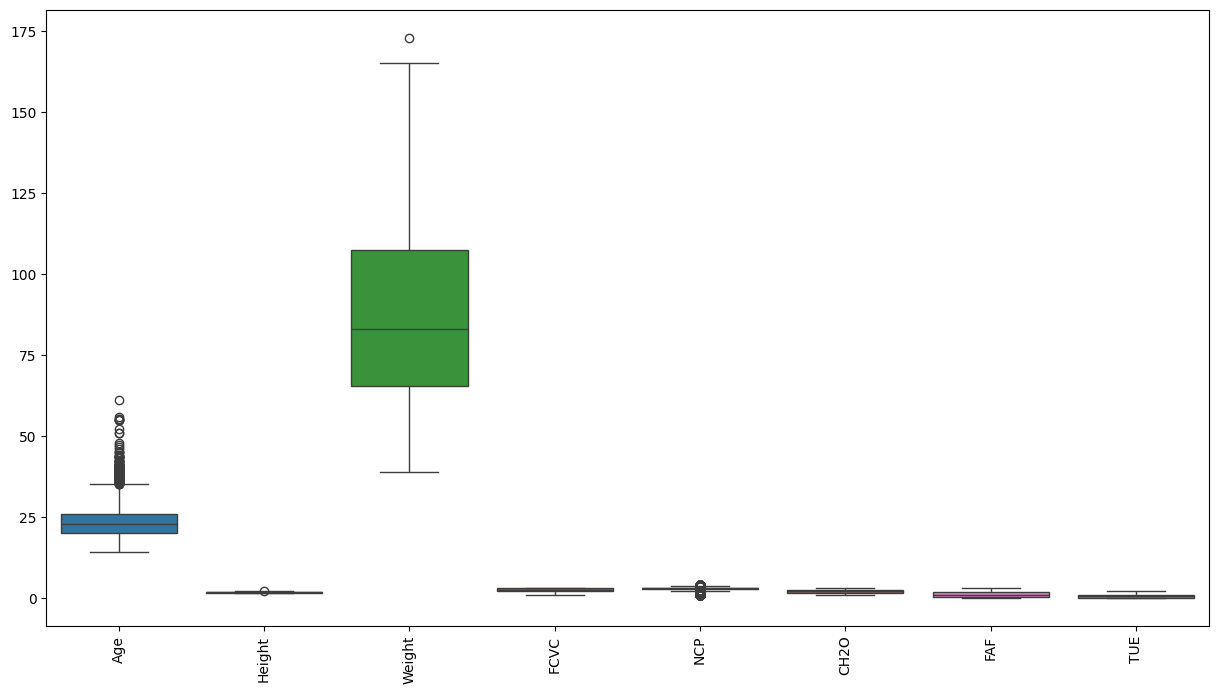

Dataset transformé sauvegardé à : C:\Users\doham\Desktop\dhd_transformed_20250316_014652.csv


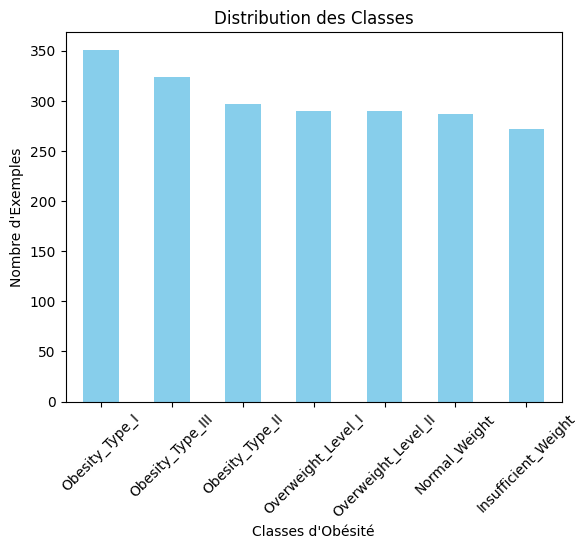

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from scipy.stats.mstats import winsorize

# Charger le dataset
import pandas as pd

url = "https://raw.githubusercontent.com/IlYaSsBJ/Coding-Week/refs/heads/main/data/raw/ObesityDataSet.csv"
df = pd.read_csv(url)

print(df.head())  # Vérifier que le fichier est bien chargé


# Afficher les premières lignes du dataset
print(df.head())
print(df.shape)
print(df.info())
print(df.describe())

# Vérification des valeurs manquantes
print("Valeurs manquantes par colonne:")
print(df.isnull().sum())

# Visualisation des outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.xticks(rotation=90)  # Rotation des labels
plt.show()

# Copie du dataset complet pour transformation
df_transformed = df.copy()

# Appliquer le Winsorizing sur les colonnes sélectionnées
for col in ["Weight", "Age"]:
    if col in df_transformed.columns:
        df_transformed[col] = winsorize(df_transformed[col], limits=[0.05, 0.05])  # Tronque les 5% inférieurs et supérieurs

# Générer un nom de fichier unique basé sur la date et l'heure
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
output_path = fr"C:\Users\doham\Desktop\dhd_transformed_{timestamp}.csv"
df_transformed.to_csv(output_path, index=False)
print(f"Dataset transformé sauvegardé à : {output_path}")

# Visualisation de la distribution des classes
df["NObeyesdad"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Distribution des Classes")
plt.xlabel("Classes d'Obésité")
plt.ylabel("Nombre d'Exemples")
plt.xticks(rotation=45)
plt.show()

**Dataset structure Before and after cleaning**

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

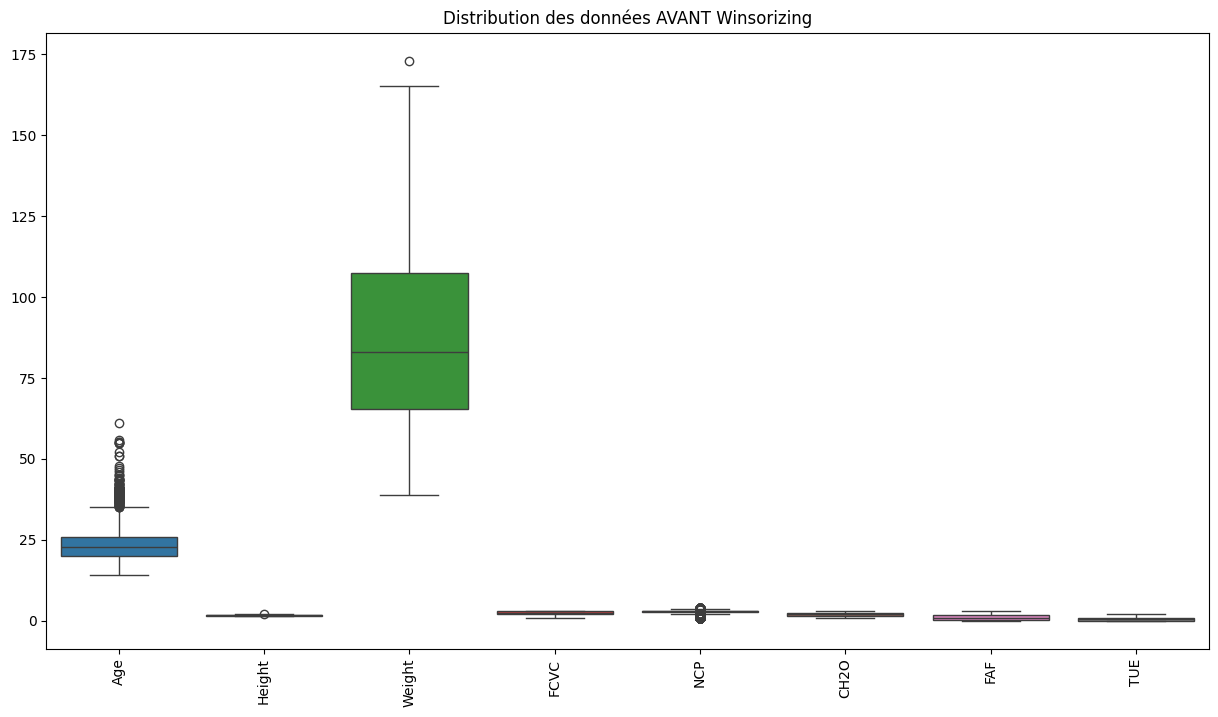

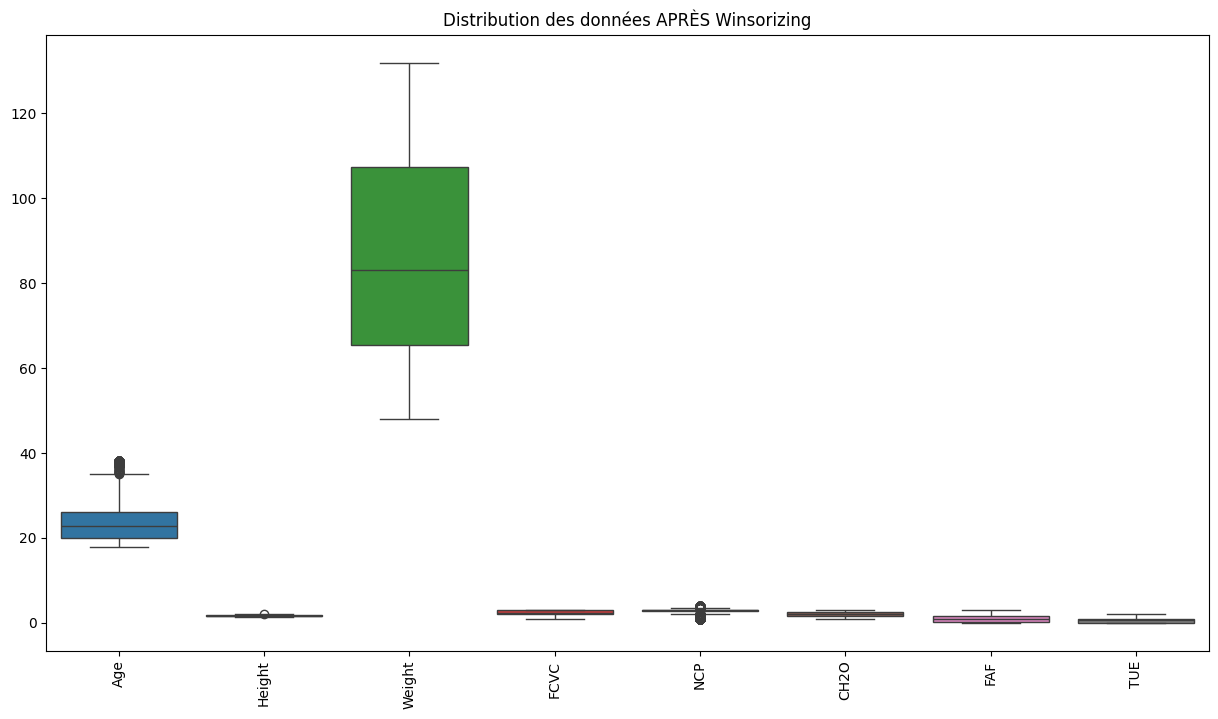

Dataset transformé sauvegardé à : C:\Users\doham\Desktop\dhd_transformed_20250316_014729.csv


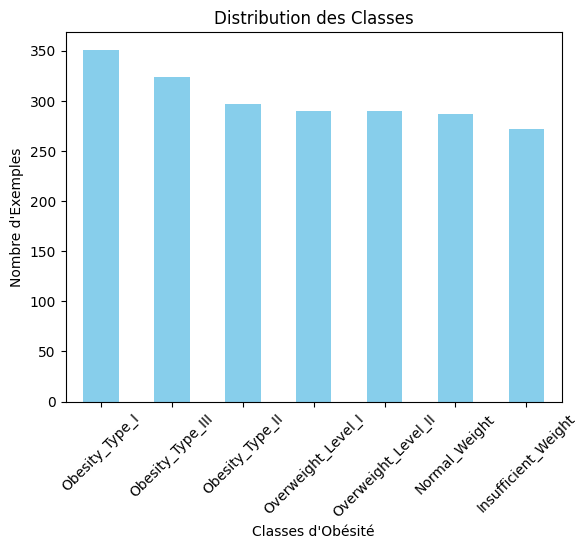

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from scipy.stats.mstats import winsorize

# Charger le dataset
import pandas as pd

url = "https://raw.githubusercontent.com/IlYaSsBJ/Coding-Week/refs/heads/main/data/raw/ObesityDataSet.csv"
df = pd.read_csv(url)

# Afficher les premières lignes du dataset
print(df.head())
print(df.shape)
print(df.info())
print(df.describe())

# Vérification des valeurs manquantes
print("Valeurs manquantes par colonne:")
print(df.isnull().sum())

# Visualisation des outliers AVANT Winsorizing
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.title("Distribution des données AVANT Winsorizing")
plt.xticks(rotation=90)
plt.show()

# Copie du dataset complet pour transformation
df_transformed = df.copy()

# Appliquer le Winsorizing sur les colonnes sélectionnées
for col in ["Weight", "Age"]:
    if col in df_transformed.columns:
        df_transformed[col] = winsorize(df_transformed[col], limits=[0.05, 0.05])  # Tronque les 5% inférieurs et supérieurs

# Visualisation des outliers APRÈS Winsorizing
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_transformed.select_dtypes(include=['number']))
plt.title("Distribution des données APRÈS Winsorizing")
plt.xticks(rotation=90)
plt.show()

# Générer un nom de fichier unique basé sur la date et l'heure
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
output_path = fr"C:\Users\doham\Desktop\dhd_transformed_{timestamp}.csv"
df_transformed.to_csv(output_path, index=False)
print(f"Dataset transformé sauvegardé à : {output_path}")

# Visualisation de la distribution des classes
df["NObeyesdad"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Distribution des Classes")
plt.xlabel("Classes d'Obésité")
plt.ylabel("Nombre d'Exemples")
plt.xticks(rotation=45)
plt.show()


**UNDERSAMPLING METHOD APPLIED ON bOTH DATASETS**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler

def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)

    # Encoder la variable cible
    label_encoder = LabelEncoder()
    df["NObeyesdad"] = label_encoder.fit_transform(df["NObeyesdad"])

    # Encoder les variables catégoriques avec One-Hot Encoding
    df = pd.get_dummies(df, columns=["Gender", "family_history_with_overweight", "FAVC",
                                     "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"], drop_first=True)

    # Séparer X et y
    X = df.drop(columns=["NObeyesdad"])
    y = df["NObeyesdad"]

    return X, y, label_encoder

def undersampling_and_evaluate(file_path, model_name="XGBoost"):
    # Charger les données
    X, y, label_encoder = load_and_prepare_data(file_path)

    # Diviser en train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    undersampler = RandomUnderSampler(sampling_strategy="auto", random_state=42)
    X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

    print(f"Training Set Size after Undersampling: {X_train_under.shape}")
    print(f"Testing Set Size: {X_test.shape}")

    model = XGBClassifier(eval_metric="mlogloss", random_state=42)
    model.fit(X_train_under, y_train_under)

    y_pred = model.predict(X_test)

    print(f"\nClassification Report for {model_name} ({file_path.split('/')[-1]}):")
    print(classification_report(y_test, y_pred))

    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel Accuracy for {model_name} ({file_path.split('/')[-1]}): {accuracy:.4f}")

    y_proba = model.predict_proba(X_test)

    y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

    auc_score = roc_auc_score(y_test_bin, y_proba, multi_class="ovr")

    print(f"ROC-AUC Score For {model_name} ({file_path.split('/')[-1]}): {auc_score:.4f}")

undersampling_and_evaluate(r"https://raw.githubusercontent.com/IlYaSsBJ/Coding-Week/refs/heads/main/data/processed/dataset.csv", "XGBoost")
undersampling_and_evaluate(r"https://raw.githubusercontent.com/IlYaSsBJ/Coding-Week/refs/heads/main/data/raw/dhd_transformed_winsoring.csv", "XGBoost")


Training Set Size after Undersampling: (140, 23)
Testing Set Size: (236, 23)

Classification Report for XGBoost (dataset.csv):
              precision    recall  f1-score   support

           0       0.74      0.67      0.71        52
           1       0.56      0.62      0.59        52
           2       0.94      0.92      0.93        36
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00        12
           5       0.67      0.71      0.69        45
           6       0.82      0.79      0.81        34

    accuracy                           0.74       236
   macro avg       0.82      0.79      0.80       236
weighted avg       0.75      0.74      0.74       236


Model Accuracy for XGBoost (dataset.csv): 0.7415
ROC-AUC Score For XGBoost (dataset.csv): 0.9329
Training Set Size after Undersampling: (1526, 23)
Testing Set Size: (423, 23)

Classification Report for XGBoost (dhd_transformed_winsoring.csv):
              precision    recal

**OVERSAMPLING METHOD APPLIED ON bOTH DATASETS**




In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)
    label_encoder = LabelEncoder()
    df["NObeyesdad"] = label_encoder.fit_transform(df["NObeyesdad"])
    df = pd.get_dummies(df, columns=["Gender", "family_history_with_overweight", "FAVC",
                                     "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"], drop_first=True)
    X = df.drop(columns=["NObeyesdad"])
    y = df["NObeyesdad"]
    return X, y, label_encoder

def oversampling_and_evaluate(file_path, model_name="XGBoost"):
    X, y, label_encoder = load_and_prepare_data(file_path)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    oversampler = SMOTE(sampling_strategy="auto", random_state=42)
    X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)
    print(f"Training Set Size after Oversampling: {X_train_over.shape}")
    print(f"Testing Set Size: {X_test.shape}")
    model = XGBClassifier(eval_metric="mlogloss", random_state=42)
    model.fit(X_train_over, y_train_over)
    y_pred = model.predict(X_test)
    print(f"\nClassification Report for {model_name} ({file_path.split('/')[-1]}):")
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel Accuracy for {model_name} ({file_path.split('/')[-1]}): {accuracy:.4f}")
    y_proba = model.predict_proba(X_test)
    y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))
    auc_score = roc_auc_score(y_test_bin, y_proba, multi_class="ovr")
    print(f"ROC-AUC Score For {model_name} ({file_path.split('/')[-1]}): {auc_score:.4f}")

oversampling_and_evaluate(r"https://raw.githubusercontent.com/IlYaSsBJ/Coding-Week/refs/heads/main/data/processed/dataset.csv", "XGBoost")
oversampling_and_evaluate(r"https://raw.githubusercontent.com/IlYaSsBJ/Coding-Week/refs/heads/main/data/raw/dhd_transformed_winsoring.csv", "XGBoost")


Training Set Size after Oversampling: (1470, 23)
Testing Set Size: (236, 23)

Classification Report for XGBoost (dataset.csv):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       0.96      0.98      0.97        52
           2       0.97      1.00      0.99        36
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00        12
           5       0.98      0.91      0.94        45
           6       0.92      0.97      0.94        34

    accuracy                           0.97       236
   macro avg       0.98      0.95      0.96       236
weighted avg       0.97      0.97      0.97       236


Model Accuracy for XGBoost (dataset.csv): 0.9703
ROC-AUC Score For XGBoost (dataset.csv): 0.9997
Training Set Size after Oversampling: (1967, 23)
Testing Set Size: (423, 23)

Classification Report for XGBoost (dhd_transformed_winsoring.csv):
              precision    recall

**Classweights METHOD APPLIED ON bOTH DATASETS**

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from xgboost import XGBClassifier


def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)
    label_encoder = LabelEncoder()
    df["NObeyesdad"] = label_encoder.fit_transform(df["NObeyesdad"])
    df = pd.get_dummies(df, columns=["Gender", "family_history_with_overweight", "FAVC",
                                     "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"], drop_first=True)
    X = df.drop(columns=["NObeyesdad"])
    y = df["NObeyesdad"]
    return X, y, label_encoder

def class_weights_and_evaluate(file_path, model_name="XGBoost"):
    X, y, label_encoder = load_and_prepare_data(file_path)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
    weights_dict = {c: w for c, w in zip(np.unique(y_train), class_weights)}
    print(f"Training Set Size: {X_train.shape}")
    print(f"Testing Set Size: {X_test.shape}")
    model = XGBClassifier(eval_metric="mlogloss", random_state=42)
    model.fit(X_train, y_train, sample_weight=np.array([weights_dict[i] for i in y_train]))
    y_pred = model.predict(X_test)
    print(f"\nClassification Report for {model_name} ({file_path.split('/')[-1]}):")
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel Accuracy for {model_name} ({file_path.split('/')[-1]}): {accuracy:.4f}")
    y_proba = model.predict_proba(X_test)
    y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))
    auc_score = roc_auc_score(y_test_bin, y_proba, multi_class="ovr")
    print(f"ROC-AUC Score For {model_name} ({file_path.split('/')[-1]}): {auc_score:.4f}")

class_weights_and_evaluate(r"https://raw.githubusercontent.com/IlYaSsBJ/Coding-Week/refs/heads/main/data/processed/dataset.csv", "XGBoost")
class_weights_and_evaluate(r"https://raw.githubusercontent.com/IlYaSsBJ/Coding-Week/refs/heads/main/data/raw/dhd_transformed_winsoring.csv", "XGBoost")

Training Set Size: (941, 23)
Testing Set Size: (236, 23)

Classification Report for XGBoost (dataset.csv):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       0.96      0.96      0.96        52
           2       0.95      1.00      0.97        36
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00        12
           5       0.98      0.91      0.94        45
           6       0.94      0.97      0.96        34

    accuracy                           0.97       236
   macro avg       0.97      0.95      0.96       236
weighted avg       0.97      0.97      0.97       236


Model Accuracy for XGBoost (dataset.csv): 0.9661
ROC-AUC Score For XGBoost (dataset.csv): 0.9996
Training Set Size: (1688, 23)
Testing Set Size: (423, 23)

Classification Report for XGBoost (dhd_transformed_winsoring.csv):
              precision    recall  f1-score   support

           0     

**TEST ROC-AUC**

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)

    # Encoder la variable cible
    label_encoder = LabelEncoder()
    df["NObeyesdad"] = label_encoder.fit_transform(df["NObeyesdad"])

    # Encoder les variables catégoriques avec One-Hot Encoding
    df = pd.get_dummies(df, columns=["Gender", "family_history_with_overweight", "FAVC",
                                     "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"], drop_first=True)

    # Séparer X et y
    X = df.drop(columns=["NObeyesdad"])
    y = df["NObeyesdad"]

    # Diviser en train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    return X_train, X_test, y_train, y_test, y, label_encoder


def train_and_evaluate_roc_auc(file_path, model_name="XGBoost"):
    # Charger les données
    X_train, X_test, y_train, y_test, y, label_encoder = load_and_prepare_data(file_path)

    # Entraîner le modèle XGBoost
    model = XGBClassifier(eval_metric="mlogloss", random_state=42)
    model.fit(X_train, y_train)

    # Prédire les probabilités
    y_proba = model.predict_proba(X_test)

    # Binariser les classes pour ROC-AUC multi-classe
    y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

    # Calcul du ROC-AUC global
    auc_score = roc_auc_score(y_test_bin, y_proba, multi_class="ovr")

    # Afficher le résultat
    print(f"ROC-AUC Score For {model_name} ({file_path.split('/')[-1]}): {auc_score:.4f}")


train_and_evaluate_roc_auc(r"https://raw.githubusercontent.com/IlYaSsBJ/Coding-Week/refs/heads/main/data/processed/dataset.csv", "XGBoost")
train_and_evaluate_roc_auc(r"https://raw.githubusercontent.com/IlYaSsBJ/Coding-Week/refs/heads/main/data/raw/dhd_transformed_winsoring.csv", "XGBoost")

ROC-AUC Score For XGBoost (dataset.csv): 0.9990
ROC-AUC Score For XGBoost (dhd_transformed_winsoring.csv): 0.9969


**MATRICES DE CONFUSION**

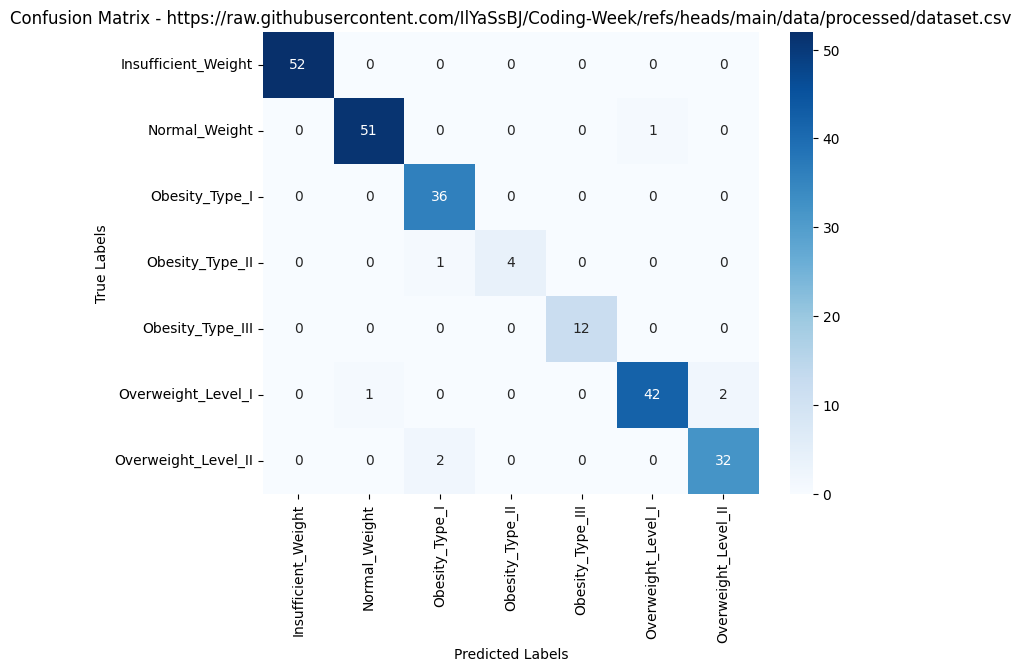

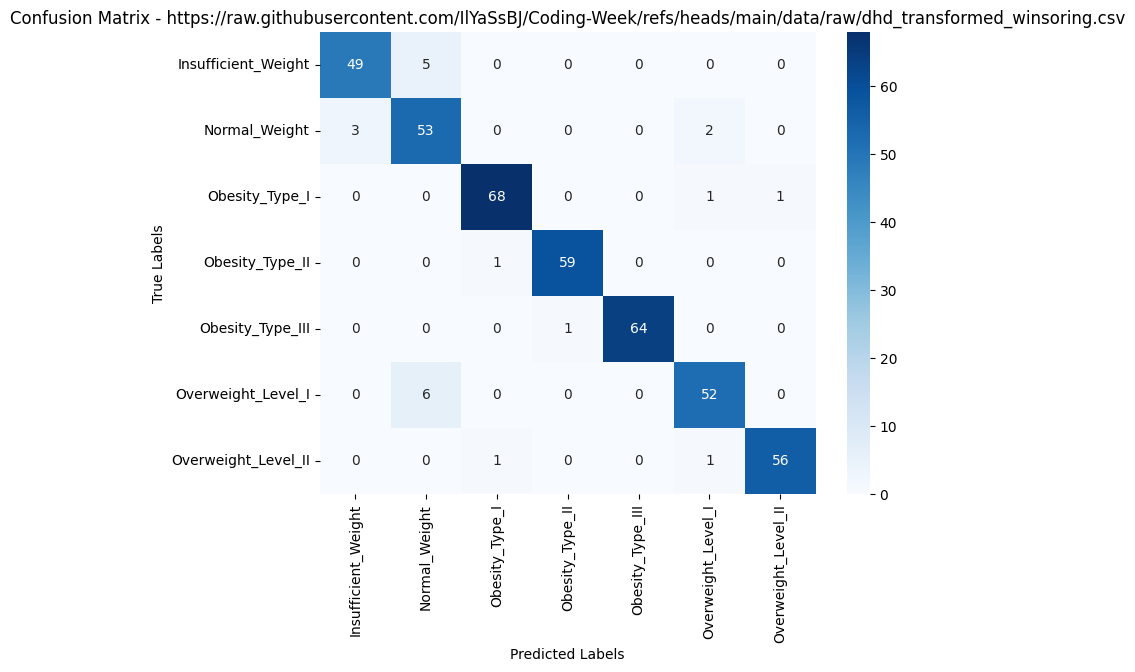

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from xgboost import XGBClassifier


def load_and_prepare_data(file_path):
    # Charger le dataset
    df = pd.read_csv(file_path)

    # Encoder la variable cible (y)
    label_encoder = LabelEncoder()
    df["NObeyesdad"] = label_encoder.fit_transform(df["NObeyesdad"])

    # Encoder les variables catégoriques avec One-Hot Encoding
    df = pd.get_dummies(df, columns=["Gender", "family_history_with_overweight", "FAVC",
                                     "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"], drop_first=True)


    X = df.drop(columns=["NObeyesdad"])
    y = df["NObeyesdad"]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    return X_train, X_test, y_train, y_test, label_encoder


file_path1 = r"https://raw.githubusercontent.com/IlYaSsBJ/Coding-Week/refs/heads/main/data/processed/dataset.csv"
X_train1, X_test1, y_train1, y_test1, label_encoder1 = load_and_prepare_data(file_path1)

model1 = XGBClassifier(eval_metric="mlogloss", random_state=42)
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)


file_path2 = r"https://raw.githubusercontent.com/IlYaSsBJ/Coding-Week/refs/heads/main/data/raw/dhd_transformed_winsoring.csv"
X_train2, X_test2, y_train2, y_test2, label_encoder2 = load_and_prepare_data(file_path2)

model2 = XGBClassifier(eval_metric="mlogloss", random_state=42)
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)


def plot_confusion_matrix(y_true, y_pred, label_encoder, dataset_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - {dataset_name}")
    plt.show()


plot_confusion_matrix(y_test1, y_pred1, label_encoder1, "https://raw.githubusercontent.com/IlYaSsBJ/Coding-Week/refs/heads/main/data/processed/dataset.csv")
plot_confusion_matrix(y_test2, y_pred2, label_encoder2, "https://raw.githubusercontent.com/IlYaSsBJ/Coding-Week/refs/heads/main/data/raw/dhd_transformed_winsoring.csv")

**CODE FINAL** **& SHAP**

Meilleurs hyperparamètres : {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}

Model Accuracy: 0.9504

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        54
           1       0.84      0.97      0.90        58
           2       0.98      0.93      0.96        70
           3       0.98      0.98      0.98        60
           4       1.00      0.98      0.99        65
           5       0.93      0.88      0.90        58
           6       0.95      0.98      0.97        58

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423

ROC-AUC Score: 0.9968


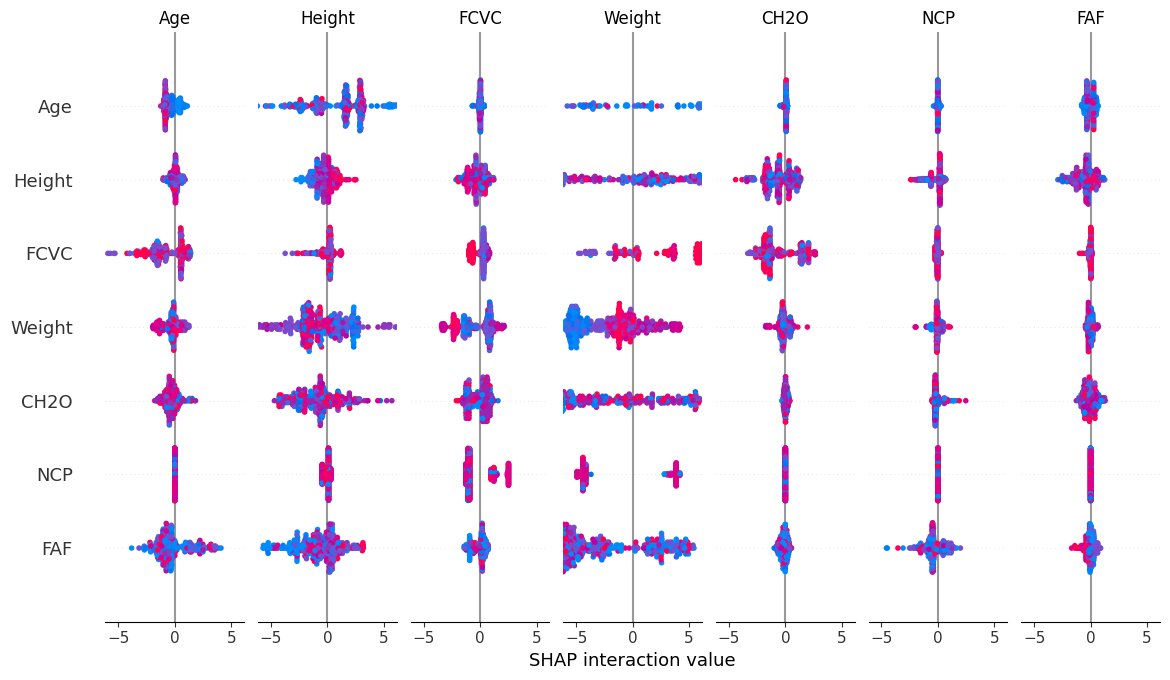

Modèle sauvegardé avec succès !


In [4]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from xgboost import XGBClassifier
import joblib
from flask import Flask, request, jsonify
import requests

def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)
    label_encoder = LabelEncoder()
    df["NObeyesdad"] = label_encoder.fit_transform(df["NObeyesdad"])
    df = pd.get_dummies(df, columns=["Gender", "family_history_with_overweight", "FAVC",
                                     "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"], drop_first=True)
    X = df.drop(columns=["NObeyesdad"])
    y = df["NObeyesdad"]
    return X, y, label_encoder

file_path = r"https://raw.githubusercontent.com/IlYaSsBJ/Coding-Week/refs/heads/main/data/raw/dhd_transformed_winsoring.csv"
X, y, label_encoder = load_and_prepare_data(file_path)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
weights_dict = {c: w for c, w in zip(np.unique(y_train), class_weights)}

params = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "n_estimators": [100, 200, 300]
}

xgb = XGBClassifier(eval_metric="mlogloss", random_state=42)

grid = GridSearchCV(xgb, param_grid=params, cv=5, scoring="roc_auc_ovr", n_jobs=-1)
grid.fit(X_train, y_train, sample_weight=np.array([weights_dict[i] for i in y_train]))

print("Meilleurs hyperparamètres :", grid.best_params_)

y_pred = grid.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

y_proba = grid.best_estimator_.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))
auc_score = roc_auc_score(y_test_bin, y_proba, multi_class="ovr")
print(f"ROC-AUC Score: {auc_score:.4f}")

explainer = shap.TreeExplainer(grid.best_estimator_)
shap_values = explainer.shap_values(X_test)

if isinstance(shap_values, list):
    shap_values_selected = shap_values[0]
else:
    shap_values_selected = shap_values

shap.summary_plot(shap_values_selected, X_test)



file_path = r"https://raw.githubusercontent.com/IlYaSsBJ/Coding-Week/refs/heads/main/data/raw/dhd_transformed_winsoring.csv"
X, y, label_encoder = load_and_prepare_data(file_path)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
weights_dict = {c: w for c, w in zip(np.unique(y_train), class_weights)}

xgb = XGBClassifier(eval_metric="mlogloss", random_state=42)
xgb.fit(X_train, y_train, sample_weight=np.array([weights_dict[i] for i in y_train]))

joblib.dump(xgb, "xgboost_model.pkl")
print("Modèle sauvegardé avec succès !")


**XGboost Model** **Training**

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier

# Charger les données
file_path = r"https://raw.githubusercontent.com/IlYaSsBJ/Coding-Week/refs/heads/main/data/raw/dhd_transformed_winsoring.csv"
df = pd.read_csv(file_path)

# Encoder la colonne cible
label_encoder = LabelEncoder()
df["NObeyesdad"] = label_encoder.fit_transform(df["NObeyesdad"])

# Transformer les variables catégoriques
df = pd.get_dummies(df, columns=["Gender", "family_history_with_overweight", "FAVC",
                                 "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"], drop_first=True)

# Séparer les données
X = df.drop(columns=["NObeyesdad"])
y = df["NObeyesdad"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Calculer les poids des classes
class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
weights_dict = {c: w for c, w in zip(np.unique(y_train), class_weights)}

# Entraîner le modèle XGBoost
model = XGBClassifier(eval_metric="mlogloss", random_state=42)
model.fit(X_train, y_train, sample_weight=np.array([weights_dict[i] for i in y_train]))

# Sauvegarder le modèle
joblib.dump(model, "xgboost_model.pkl")
print(" Modèle XGBoost Entraîné et Sauvegardé !")


**APP**

In [ ]:
import streamlit as st
import joblib
import pandas as pd
import time

st.set_page_config(page_title="Outil Médical de Diagnostic de l'Obésité", layout="wide")
st.title("🩺 **Outil Médical de Diagnostic de l'Obésité**")
st.divider()

model = joblib.load("xgboost_model.pkl")

expected_features = [
    "Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE",
    "Gender_Male", "family_history_with_overweight_yes", "FAVC_yes",
    "CAEC_Frequently", "CAEC_Sometimes", "CAEC_no", "SMOKE_yes", "SCC_yes",
    "CALC_Frequently", "CALC_Sometimes", "CALC_no", "MTRANS_Bike",
    "MTRANS_Motorbike", "MTRANS_Public_Transportation", "MTRANS_Walking"
]

st.subheader(" **Saisie des Informations du Patient**")

col1, col2 = st.columns(2)

with col1:
    age = st.slider("**Âge du Patient**", 10, 100, 25)
    height = st.slider("**Taille (m)**", 1.0, 2.5, 1.75)
    weight = st.slider("**Poids (kg)**", 30, 200, 70)
    activity = st.selectbox("**Activité Physique**", ["Faible", "Moyenne", "Élevée"])

with col2:
    food_intake = st.selectbox("**Consommation d'Aliments Caloriques**", ["Rare", "Modérée", "Fréquente"])
    vegetables = st.slider("**Consommation de Légumes (fréquence sur 5)**", 0, 5, 2)
    water_intake = st.slider("**Consommation d'Eau (L/jour)**", 0, 5, 2)
    smoking = st.selectbox("**Patient Fumeur ?**", ["Non", "Oui"])


if st.button(" Réinitialiser les valeurs"):
    st.rerun()

input_data = pd.DataFrame([[age, height, weight, activity, food_intake, vegetables, water_intake, smoking]],
                          columns=["Age", "Height", "Weight", "Activity", "Food_Intake", "Vegetables", "Water_Intake", "Smoking"])

encoding_dict = {
    "Activity": {"Faible": 0, "Moyenne": 1, "Élevée": 2},
    "Food_Intake": {"Rare": 0, "Modérée": 1, "Fréquente": 2},
    "Smoking": {"Non": 0, "Oui": 1}
}

for col, mapping in encoding_dict.items():
    input_data[col] = input_data[col].map(mapping)

for col in expected_features:
    if col not in input_data.columns:
        input_data[col] = 0

input_data = input_data[expected_features]

# === IMC ====
def get_imc_obesity_level(imc):
    if imc < 18.5:
        return "Poids Insuffisant"
    elif 18.5 <= imc < 25:
        return "Poids Normal"
    elif 25 <= imc < 30:
        return "Surpoids Niveau I"
    elif 30 <= imc < 35:
        return "Obésité Type I"
    elif 35 <= imc < 40:
        return "Obésité Type II"
    else:
        return "Obésité Type III"

obesity_levels = {
    0: "Poids Insuffisant",
    1: "Poids Normal",
    2: "Surpoids Niveau I",
    3: "Surpoids Niveau II",
    4: "Obésité Type I",
    5: "Obésité Type II",
    6: "Obésité Type III"
}


obesity_info_messages = {
    "Poids Insuffisant": "⚠️ Le patient présente un poids insuffisant, ce qui peut causer des carences nutritionnelles et une fragilité osseuse.",
    "Poids Normal": "✅ Le patient est dans une fourchette de poids normale. Maintenir une alimentation équilibrée et une activité physique régulière.",
    "Surpoids Niveau I": "⚠️ Le patient est en surpoids. Il est recommandé d'améliorer l'activité physique et de surveiller l'alimentation.",
    "Obésité Type I": "⚠️ Le patient présente une obésité modérée. Une consultation médicale est conseillée pour éviter les complications.",
    "Obésité Type II": "⚠️ Obésité sévère. Un suivi médical est fortement recommandé pour prévenir les maladies cardiovasculaires et métaboliques.",
    "Obésité Type III": "⚠️ Obésité morbide. Une prise en charge médicale urgente est nécessaire pour éviter des complications graves."
}

if st.button(" **Analyser le Patient**", key="prediction_button"):
    prediction = model.predict(input_data)[0]
    predicted_obesity = obesity_levels[prediction]

    # === IMC Calculus ===
    imc = weight / (height ** 2)
    imc_obesity = get_imc_obesity_level(imc)

    # === Prediction ===

    st.subheader(" **Diagnostic Médical**")
    st.success(f" **Classification du Modèle :** {predicted_obesity}")
    st.info(f" **IMC Calculé :** {imc:.2f} → **Classification selon l'IMC :** {imc_obesity}")

    # === Medical Explanation ===
    if st.checkbox(" Voir les explications médicales détaillées"):
        st.warning(obesity_info_messages[predicted_obesity])

    # === Doctor's feedback ===

    st.subheader("🩺 **Validation Médicale et Feedback**")
    feedback = st.radio("Le diagnostic du modèle est-il correct ?", ("Oui", "Non"), horizontal=True)

    correction = None
    if feedback == "Non":
        st.warning("Sélectionnez la correction appropriée avant de soumettre.")
        correction = st.selectbox("**Correction Médicale :**", list(obesity_levels.values()))

    # === Submit feedback ===

    if st.button(" **Soumettre le Feedback**", key="submit_feedback"):
        with st.spinner("Enregistrement du feedback..."):
            time.sleep(2)
            if feedback == "Oui":
                st.success(" **Feedback soumis :** Le diagnostic est validé.")
            else:
                if correction:
                    with open("model_feedback.csv", "a") as f:
                        f.write(f"{age},{height},{weight},{activity},{food_intake},{vegetables},{water_intake},{smoking},{correction}\n")
                    st.success(f" **Correction enregistrée :** Le modèle prendra en compte '{correction}' lors de la prochaine mise à jour.")
                else:
                    st.error(" **Erreur :** Veuillez sélectionner une correction avant de soumettre.")

